In [290]:
import sys
sys.path.append('../parser/')

In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
from datetime import datetime
import psycopg2

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

tqdm.pandas()
warnings.filterwarnings('ignore')

In [292]:
conn = psycopg2.connect(
    "dbname=mydatabase user=myuser password=mypassword host=localhost port=5432")
cursor = conn.cursor()

### Getting data from database


In [293]:
products = pd.read_sql_query("SELECT * FROM product", conn)
sellers = pd.read_sql_query("SELECT * FROM seller", conn)

In [294]:
import json

# Use the existing products DataFrame
products_data = products.copy()

# Deserialize the characteristics and about from JSON
products_data['characteristics'] = products_data['characteristics'].apply(
    lambda x: json.loads(x) if isinstance(x, str) else x)
products_data['about'] = products_data['about'].apply(
    lambda x: json.loads(x) if isinstance(x, str) else x)

# Sellers to DataFrame
sellers_data = sellers.copy()

In [295]:
products_data.head()

,link,version,condition,is_pro,is_max,capacity,price_coeff,title,price,characteristics,description,views,date,location,seller_id,today_views,about,is_sold
0,https://www.avito.ru/sankt-peterburg/telefony/iphone_16e_128_gb_7254184544?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJQY2hVQk51WUtEaHZLS3U3Ijt9GSaqXz8AAAA,16.000,Новое,False,False,128.000,None,"iPhone 16e, 128 ГБ",50400.000,"{'Производитель': 'Apple', 'Модель': 'iPhone 16e', 'Встроенная память': '128 ГБ', 'Цвет': 'Белый'}",Новый. Запечaтанный. Oригинал),4329.000,2025-03-14 16:44:00,"Санкт-Петербург, ул. Жуковского, 28",/brands/i137588249,8.000,"{'Состояние': 'Новое', 'Коробка запечатана': 'Да', 'Комплект': 'Коробка, Провод зарядки'}",False
1,https://www.avito.ru/sankt-peterburg/telefony/iphone_12_128_gb_4602373909?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJQY2hVQk51WUtEaHZLS3U3Ijt9GSaqXz8AAAA,12.000,Хорошее,False,False,128.000,None,"iPhone 12, 128 ГБ",20090.000,"{'Производитель': 'Apple', 'Модель': 'iPhone 12', 'Встроенная память': '128 ГБ', 'Цвет': 'Чёрный'}",🔥Гаpантия лучшeй цeны🔥,7124.000,2025-04-07 14:25:00,"Санкт-Петербург, пл. Стачек, 9",/brands/244096b73b687e69b4c9374622919ee3,5.000,"{'Состояние': 'Хорошее', 'Экран': '1–2 мелкие царапины', 'Корпус': 'Мелкие царапины', 'Состояние аккумулятора': '95 %'}",False
2,https://www.avito.ru/sankt-peterburg/telefony/iphone_15_128_gb_4267492589?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJQY2hVQk51WUtEaHZLS3U3Ijt9GSaqXz8AAAA,15.000,Новое,False,False,128.000,None,"iPhone 15, 128 ГБ",54990.000,"{'Производитель': 'Apple', 'Модель': 'iPhone 15', 'Встроенная память': '128 ГБ', 'Цвет': 'Чёрный'}",🍏OБHОBИTЕ iРhonе С ВЫГОДOЙ по нaшей прoграмме ТRАDE-IN! 🍏Пoлучитe cкидку нa нoвый телефон УЖЕ CЕГОДHЯ!🍏 Бecплатнaя достaвка пo гopoду🍏 ОПЛATА ЧACTЯМИ или РAСCPОЧKА🍏,17937.000,2025-01-02 11:45:00,"Санкт-Петербург, Садовая ул., 38",/brands/i59503469,7.000,"{'Состояние': 'Новое', 'Коробка запечатана': 'Да', 'Комплект': 'Коробка, Провод зарядки'}",False
3,https://www.avito.ru/sankt-peterburg/telefony/iphone_16_128_gb_4486577952?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJQY2hVQk51WUtEaHZLS3U3Ijt9GSaqXz8AAAA,16.000,Новое,False,False,128.000,None,"iPhone 16, 128 ГБ",64900.000,"{'Производитель': 'Apple', 'Модель': 'iPhone 16', 'Встроенная память': '128 ГБ', 'Цвет': 'Розовый'}","HОВЫЙ, ЗАПЕЧАТAННЫЙ",4078.000,2025-04-08 13:23:00,Санкт-Петербург,/brands/i183466761,16.000,"{'Состояние': 'Новое', 'Коробка запечатана': 'Да', 'Комплект': 'Коробка, Провод зарядки'}",False
4,/sankt-peterburg/telefony/iphone_16_256_gb_4647179856,16.000,None,False,False,256.000,None,"iPhone 16, 256 ГБ",73900.000,None,None,NaN,2025-02-27 11:12:00,"Санкт-Петербург, ул. Жуковского, 28",/brands/i183466761,NaN,None,True


In [296]:
df = products_data
df.describe()

,version,capacity,price,views,today_views
count,1022.000,1046.000,1047.000,640.000,640.000
mean,12.776,179.957,39381.585,6362.222,26.627
std,2.345,129.682,30610.236,14107.426,64.634
min,4.000,1.000,100.000,0.000,0.000
25%,11.000,128.000,14990.000,229.500,4.000
50%,13.000,128.000,29999.000,1137.500,10.000
75%,15.000,256.000,57990.000,6032.500,24.000
max,16.000,1024.000,132500.000,99168.000,975.000


### Cleaning data


на некоторые проданные товары на сайте выдается слишком низкая цена


In [297]:
products_data['price'] = products_data.apply(
    lambda x: None if x['is_sold'] and x['price'] < 1000 else x['price'], axis=1)

# products_data['date'] to datetime
products_data['date'] = pd.to_datetime(
    products_data['date'], format='%Y-%m-%d %H:%M:%S')

In [298]:
sellers_data['registered'] = pd.to_datetime(
    sellers_data['registered'], format='%Y-%m-%d %H:%M:%S')
sellers_data.head()

,seller_id,name,rating,reviews,subscribers,subscriptions,registered,done_deals,active_deals,docs_confirmed,phone_confirmed,response_time
0,/brands/i59503469,MIRAPHONE - Центр Скупки,4.800,1222.000,8863.000,1.000,2014-09-01,23.000,549.000,False,False,Отвечает около 30 минут
1,/brands/fonmart,"Магазин электроники ""Фонмарт""",4.800,545.000,9742.000,0.000,2019-09-01,26.000,292.000,False,True,Отвечает за несколько часов
2,/brands/amarketspb,Apple Market СПб - Оригинальная техника с гарантией,5.000,291.000,359.000,72.000,2010-11-01,119.000,120.000,True,False,Отвечает около часа
3,/brands/244096b73b687e69b4c9374622919ee3,te:hub - Магазин цифровой техники,4.800,274.000,848.000,0.000,2024-06-01,34.000,215.000,False,False,Отвечает около 30 минут
4,/brands/i137588249,Texno Yard,5.000,2116.000,4705.000,38.000,2018-06-01,123.000,220.000,False,False,None


---


In [299]:
# merge the data
df = products_data
df = df.merge(sellers_data, on='seller_id')

In [300]:
df.head()

,link,version,condition,is_pro,is_max,capacity,price_coeff,title,price,characteristics,description,views,date,location,seller_id,today_views,about,is_sold,name,rating,reviews,subscribers,subscriptions,registered,done_deals,active_deals,docs_confirmed,phone_confirmed,response_time
0,https://www.avito.ru/sankt-peterburg/telefony/iphone_16e_128_gb_7254184544?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJQY2hVQk51WUtEaHZLS3U3Ijt9GSaqXz8AAAA,16.000,Новое,False,False,128.000,None,"iPhone 16e, 128 ГБ",50400.000,"{'Производитель': 'Apple', 'Модель': 'iPhone 16e', 'Встроенная память': '128 ГБ', 'Цвет': 'Белый'}",Новый. Запечaтанный. Oригинал),4329.000,2025-03-14 16:44:00,"Санкт-Петербург, ул. Жуковского, 28",/brands/i137588249,8.000,"{'Состояние': 'Новое', 'Коробка запечатана': 'Да', 'Комплект': 'Коробка, Провод зарядки'}",False,Texno Yard,5.000,2116.000,4705.000,38.000,2018-06-01,123.000,220.000,False,False,None
1,https://www.avito.ru/sankt-peterburg/telefony/iphone_12_128_gb_4602373909?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJQY2hVQk51WUtEaHZLS3U3Ijt9GSaqXz8AAAA,12.000,Хорошее,False,False,128.000,None,"iPhone 12, 128 ГБ",20090.000,"{'Производитель': 'Apple', 'Модель': 'iPhone 12', 'Встроенная память': '128 ГБ', 'Цвет': 'Чёрный'}",🔥Гаpантия лучшeй цeны🔥,7124.000,2025-04-07 14:25:00,"Санкт-Петербург, пл. Стачек, 9",/brands/244096b73b687e69b4c9374622919ee3,5.000,"{'Состояние': 'Хорошее', 'Экран': '1–2 мелкие царапины', 'Корпус': 'Мелкие царапины', 'Состояние аккумулятора': '95 %'}",False,te:hub - Магазин цифровой техники,4.800,274.000,848.000,0.000,2024-06-01,34.000,215.000,False,False,Отвечает около 30 минут
2,https://www.avito.ru/sankt-peterburg/telefony/iphone_15_128_gb_4267492589?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJQY2hVQk51WUtEaHZLS3U3Ijt9GSaqXz8AAAA,15.000,Новое,False,False,128.000,None,"iPhone 15, 128 ГБ",54990.000,"{'Производитель': 'Apple', 'Модель': 'iPhone 15', 'Встроенная память': '128 ГБ', 'Цвет': 'Чёрный'}",🍏OБHОBИTЕ iРhonе С ВЫГОДOЙ по нaшей прoграмме ТRАDE-IN! 🍏Пoлучитe cкидку нa нoвый телефон УЖЕ CЕГОДHЯ!🍏 Бecплатнaя достaвка пo гopoду🍏 ОПЛATА ЧACTЯМИ или РAСCPОЧKА🍏,17937.000,2025-01-02 11:45:00,"Санкт-Петербург, Садовая ул., 38",/brands/i59503469,7.000,"{'Состояние': 'Новое', 'Коробка запечатана': 'Да', 'Комплект': 'Коробка, Провод зарядки'}",False,MIRAPHONE - Центр Скупки,4.800,1222.000,8863.000,1.000,2014-09-01,23.000,549.000,False,False,Отвечает около 30 минут
3,https://www.avito.ru/sankt-peterburg/telefony/iphone_16_128_gb_4486577952?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJQY2hVQk51WUtEaHZLS3U3Ijt9GSaqXz8AAAA,16.000,Новое,False,False,128.000,None,"iPhone 16, 128 ГБ",64900.000,"{'Производитель': 'Apple', 'Модель': 'iPhone 16', 'Встроенная память': '128 ГБ', 'Цвет': 'Розовый'}","HОВЫЙ, ЗАПЕЧАТAННЫЙ",4078.000,2025-04-08 13:23:00,Санкт-Петербург,/brands/i183466761,16.000,"{'Состояние': 'Новое', 'Коробка запечатана': 'Да', 'Комплект': 'Коробка, Провод зарядки'}",False,Магазин Yard,5.000,1152.000,2743.000,25.000,2020-06-01,233.000,82.000,False,False,Отвечает около 30 минут
4,/sankt-peterburg/telefony/iphone_16_256_gb_4647179856,16.000,None,False,False,256.000,None,"iPhone 16, 256 ГБ",73900.000,None,None,NaN,2025-02-27 11:12:00,"Санкт-Петербург, ул. Жуковского, 28",/brands/i183466761,NaN,None,True,Магазин Yard,5.000,1152.000,2743.000,25.000,2020-06-01,233.000,82.000,False,False,Отвечает около 30 минут


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   link             1047 non-null   object        
 1   version          1022 non-null   float64       
 2   condition        640 non-null    object        
 3   is_pro           1047 non-null   bool          
 4   is_max           1047 non-null   bool          
 5   capacity         1046 non-null   float64       
 6   price_coeff      0 non-null      object        
 7   title            1047 non-null   object        
 8   price            1047 non-null   float64       
 9   characteristics  640 non-null    object        
 10  description      611 non-null    object        
 11  views            640 non-null    float64       
 12  date             1047 non-null   datetime64[ns]
 13  location         1047 non-null   object        
 14  seller_id        1047 non-null   object 

array([[<Axes: title={'center': 'version'}>,
        <Axes: title={'center': 'capacity'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'views'}>],
       [<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'today_views'}>,
        <Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'reviews'}>],
       [<Axes: title={'center': 'subscribers'}>,
        <Axes: title={'center': 'subscriptions'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'done_deals'}>],
       [<Axes: title={'center': 'active_deals'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

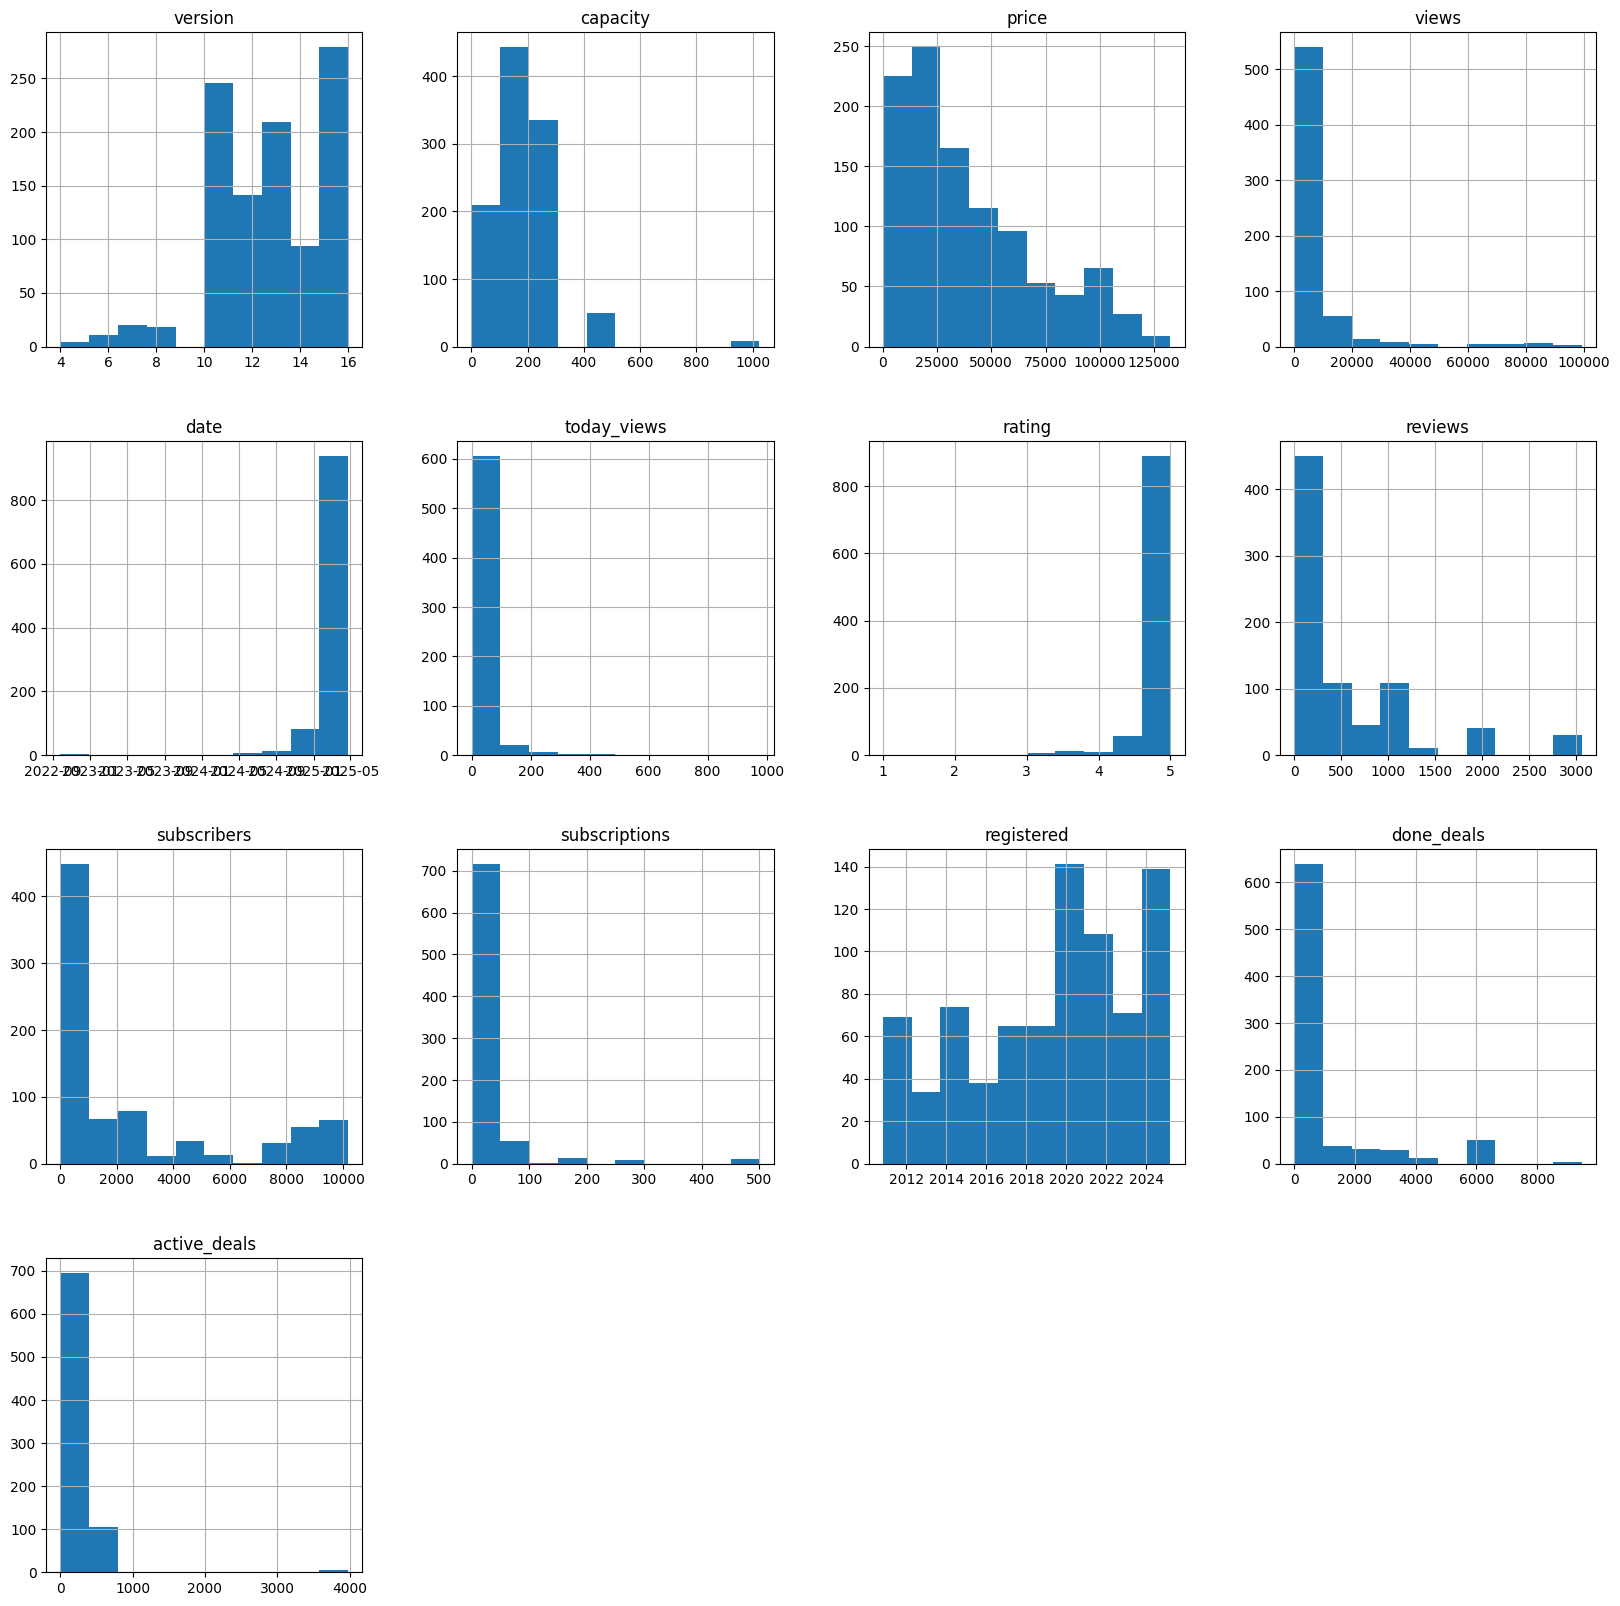

In [302]:
df.hist(figsize=(20, 20))

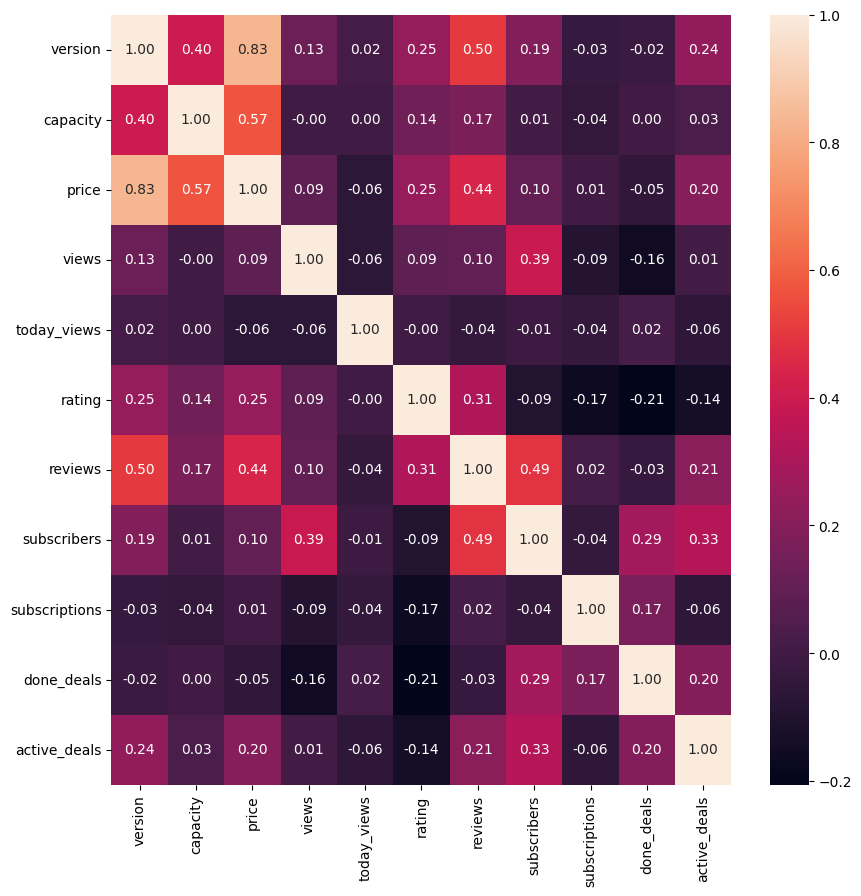

In [303]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

### Изучение признаков


In [304]:
def min_max_scaler(x):
    return (x - x.min()) / (x.max() - x.min())

In [305]:
df_an = df.copy()

In [306]:
df_an.sort_values(by='price', ascending=True).head(10)
# узнать порок до адекватной цены (посотреть где был скачок)

,link,version,condition,is_pro,is_max,capacity,price_coeff,title,price,characteristics,description,views,date,location,seller_id,today_views,about,is_sold,name,rating,reviews,subscribers,subscriptions,registered,done_deals,active_deals,docs_confirmed,phone_confirmed,response_time
903,https://www.avito.ru/sankt-peterburg/telefony/iphone_5_32_gb_7322117909?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJXdU1zTjVWSUJYR2Q0dlUxIjt9BYqBKj8AAAA,5.000,Хорошее,False,False,32.000,None,"iPhone 5, 32 ГБ",100.000,"{'Производитель': 'Apple', 'Модель': 'iPhone 5', 'Встроенная память': '32 ГБ', 'Цвет': 'Чёрный'}","(ЦЕНА ДОГОВОРНАЯ!!!)iphone 5, состояние в норме, хорошо работает, зарядки хватает на день даже больше, ну если не сидеть в нем каждую минуту, все работает (только встречи) обмен возможен",640.000,2025-04-20 20:14:00,Санкт-Петербург,12a27f3c-e1a8-453c-878b-522bc49c1acd,252.000,"{'Состояние': 'Хорошее', 'Экран': 'Много мелких царапин', 'Корпус': 'Мелкие царапины'}",False,Unknown,5.000,NaN,NaN,NaN,NaT,NaN,NaN,False,False,Отвечает около 30 минут
848,https://www.avito.ru/sankt-peterburg/telefony/iphone_5_32_gb_7322117909?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiIxMWc0ckxTb292Q1ZEdmhIIjt97mHCoD8AAAA,5.000,Хорошее,False,False,32.000,None,"iPhone 5, 32 ГБ",100.000,"{'Производитель': 'Apple', 'Модель': 'iPhone 5', 'Встроенная память': '32 ГБ', 'Цвет': 'Чёрный'}","(ЦЕНА ДОГОВОРНАЯ!!!)iphone 5, состояние в норме, хорошо работает, зарядки хватает на день даже больше, ну если не сидеть в нем каждую минуту, все работает (только встречи) обмен возможен",640.000,2025-04-20 20:14:00,Санкт-Петербург,47a8a51f-58f0-4400-9ba5-437ef0f263ad,252.000,"{'Состояние': 'Хорошее', 'Экран': 'Много мелких царапин', 'Корпус': 'Мелкие царапины'}",False,Unknown,5.000,NaN,NaN,NaN,NaT,NaN,NaN,False,False,Отвечает около 30 минут
287,https://www.avito.ru/sankt-peterburg/telefony/iphone_xr_64_gb_7309720096?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJzRkViSU9FbXJOa3c0TVNLIjt9hdumEj8AAAA,10.000,Требуется ремонт,False,False,64.000,None,"iPhone Xr, 64 ГБ",624.000,"{'Производитель': 'Apple', 'Модель': 'iPhone Xr', 'Встроенная память': '64 ГБ', 'Цвет': 'Розовый', 'IMEI': '**********28459'}",Продаётся на запчасти,22.000,2025-04-10 01:50:00,Санкт-Петербург,db205599-2c52-4eeb-9397-6ff2f05aed2d,22.000,"{'Состояние': 'Требуется ремонт', 'Экран': 'Много мелких царапин', 'Корпус': 'Сколы, трещины', 'Состояние аккумулятора': '86 %', 'Работа устройства': 'Не включается', 'Камера': 'Трещины и сколы', 'Не работают датчики': 'Сканер лица'}",False,Unknown,5.000,NaN,NaN,NaN,NaT,NaN,NaN,False,False,Отвечает около часа
878,/sankt-peterburg/telefony/iphone_4s_16_gb_7308483029,4.000,None,False,False,16.000,None,"iPhone 4S, 16 ГБ",1100.000,None,None,NaN,2025-04-16 23:07:00,"Санкт-Петербург, Плесецкая ул., 20к1",/brands/4b66f5ec7a00fc4dc3602375a2aa7ef4,NaN,None,True,Максим,4.900,72.000,11.000,1.000,2017-11-01,145.000,5.000,False,False,Отвечает около 30 минут
637,https://www.avito.ru/sankt-peterburg/telefony/iphone_xr_64_gb_7256382772?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJHWUVNMnZxWTVHVkVlWnFqIjt9FgLIoT8AAAA,10.000,Удовлетворительное,False,False,64.000,None,"iPhone Xr, 64 ГБ",1111.000,"{'Производитель': 'Apple', 'Модель': 'iPhone Xr', 'Встроенная память': '64 ГБ', 'Цвет': 'Чёрный', 'IMEI': '**********91174'}",Iphone xr полностью в исправном все дефекты указаны на фото все вопросы в лс то есть обмен с моей доплатой цену предлагать!!!,3662.000,2025-03-24 17:46:00,Санкт-Петербург,6fa3d9e7-5dac-4dc6-be89-07ae3d6e36cf,65.000,"{'Состояние': 'Удовлетворительное', 'Экран': '1–2 мелкие царапины', 'Корпус': 'Мелкие царапины', 'Состояние аккумулятора': '74 %'}",False,Unknown,NaN,NaN,NaN,NaN,NaT,NaN,NaN,False,False,Отвечает около часа
367,https://www.avito.ru/sankt-peterburg/telefony/iphone_xr_64_gb_7256382772?context=H4sIAAAAAAAA_wE_AMD

<Axes: xlabel='version', ylabel='price'>

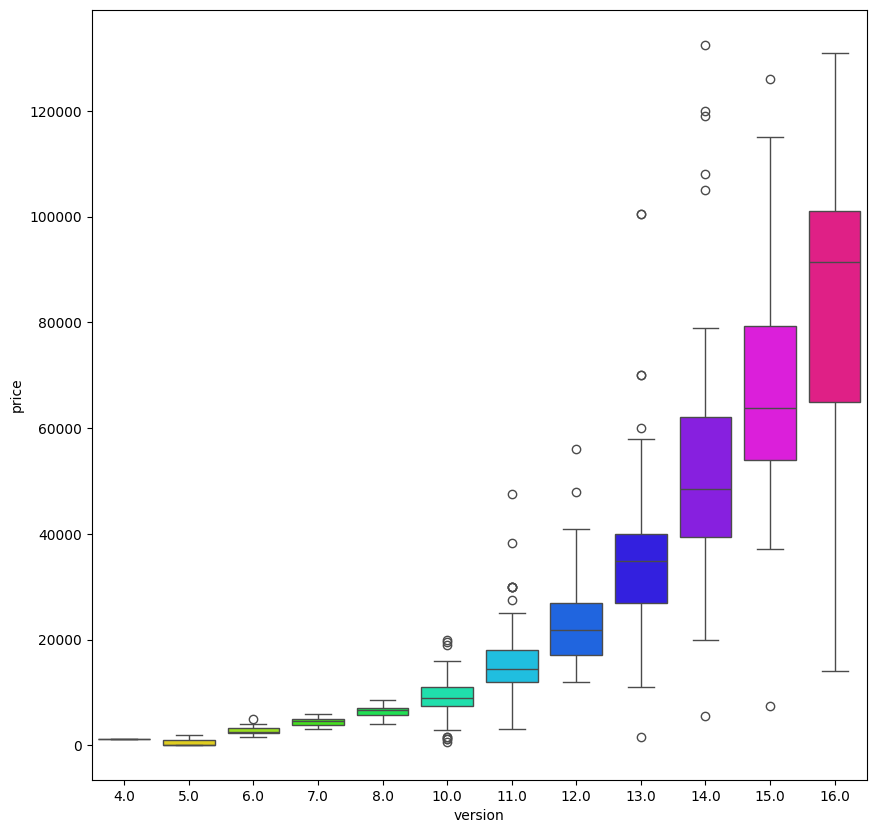

In [307]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='version', y='price', data=df_an, palette='hsv')

In [308]:
# вывести кол-во данных по каждой модели
# можн оубрать супер старые версии

По графикам видно, что людям больше интересны версии 10, 11, 13, 15

на последнюю версию (16) интереса сравнительно меньше


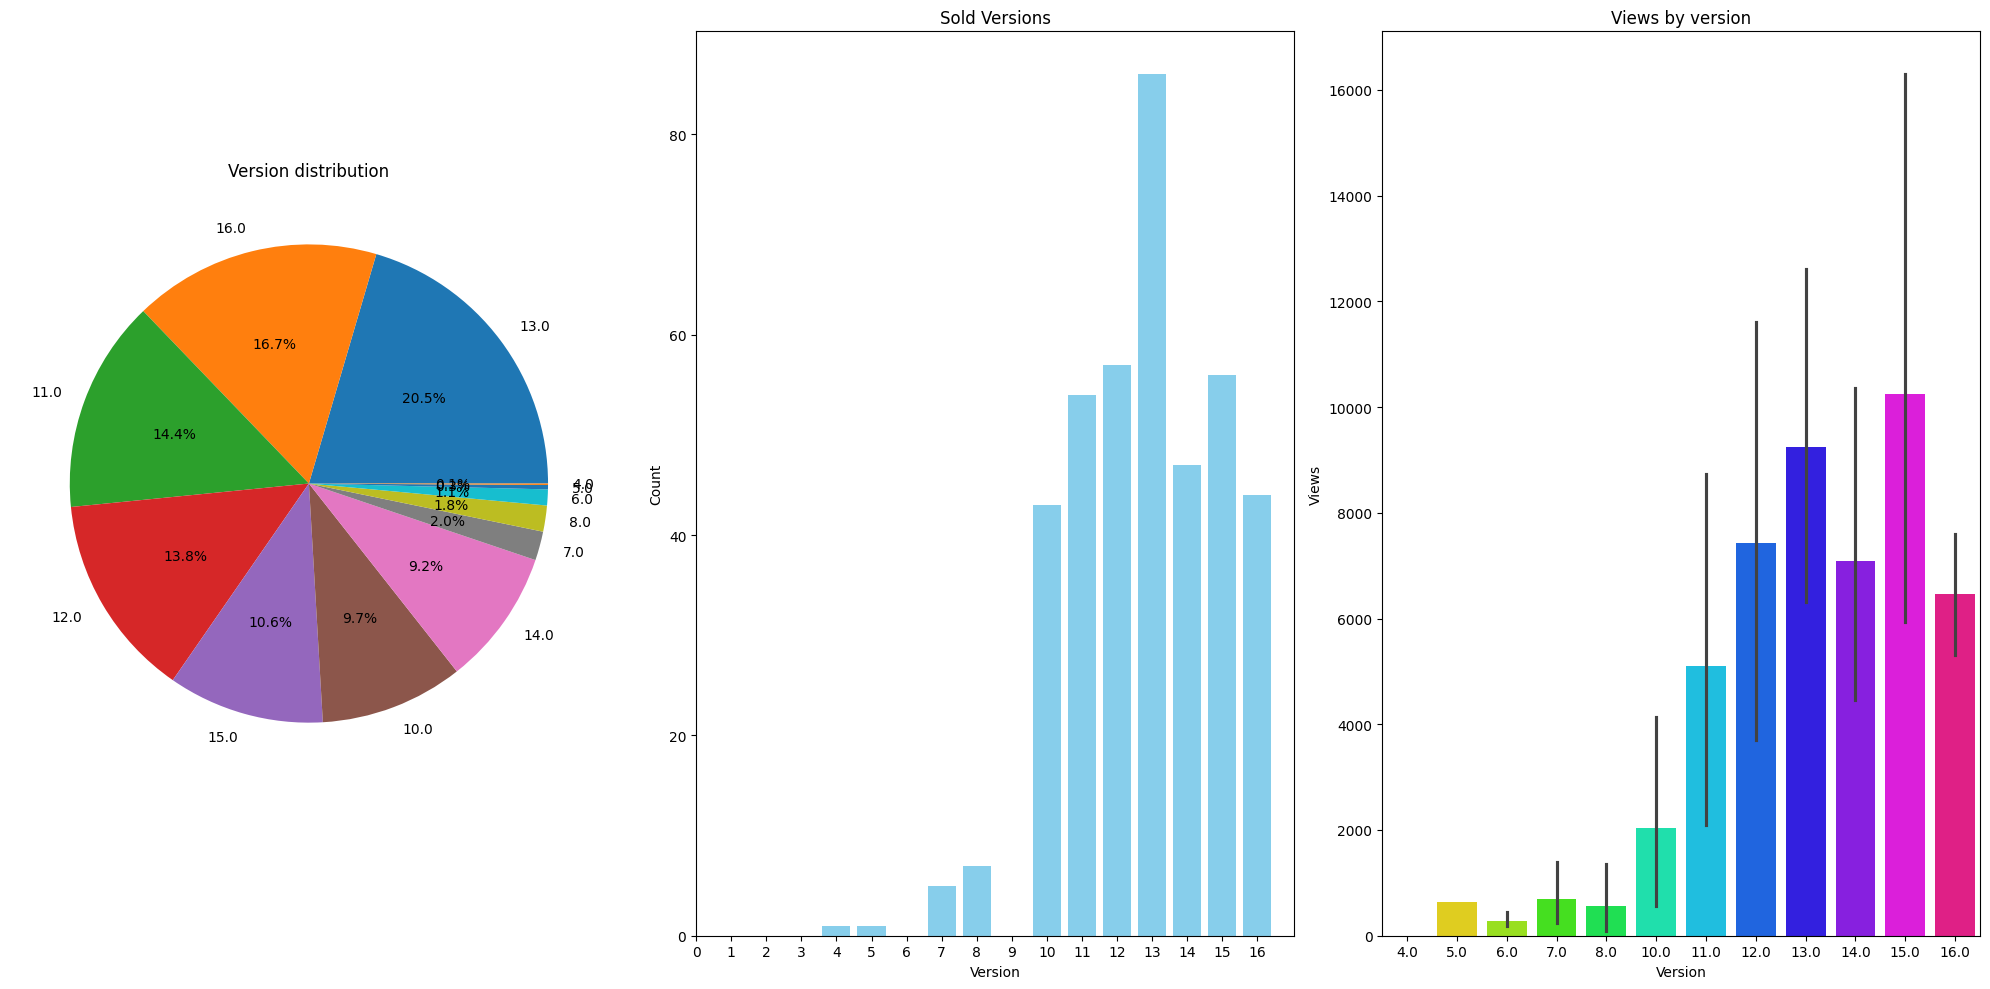

In [309]:
version_counts = df['version'].value_counts()
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].pie(version_counts, labels=version_counts.index, autopct='%1.1f%%')
ax[0].set_title('Version distribution')

df_sold_counts = df_an[df_an['is_sold']]['version'].value_counts()
ax[1].bar(df_sold_counts.index, df_sold_counts.values, color='skyblue')
ax[1].set_title('Sold Versions')
ax[1].set_xlabel('Version')
ax[1].set_ylabel('Count')

ax[1].set_xticks(range(17))

sns.barplot(x='version', y='views', data=df_an, palette='hsv')
ax[2].set_title('Views by version')
ax[2].set_xlabel('Version')
ax[2].set_ylabel('Views')


plt.tight_layout()
plt.show()

In [310]:
df[df['version'] == 11].head(10)

,link,version,condition,is_pro,is_max,capacity,price_coeff,title,price,characteristics,description,views,date,location,seller_id,today_views,about,is_sold,name,rating,reviews,subscribers,subscriptions,registered,done_deals,active_deals,docs_confirmed,phone_confirmed,response_time
67,/sankt-peterburg/telefony/iphone_11_128_gb_7268363135,11.000,None,False,False,128.000,None,"iPhone 11, 128 ГБ",17990.000,None,None,NaN,2025-04-05 19:34:00,"Санкт-Петербург, пр-т Испытателей, 39",/brands/maliphone,NaN,None,True,МАЛИФОН - ТОП 1,4.900,561.000,8748.000,0.000,2014-12-01,169.000,144.000,False,False,Отвечает около часа
69,https://www.avito.ru/sankt-peterburg/telefony/iphone_11_128_gb_2622620783?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJQY2hVQk51WUtEaHZLS3U3Ijt9GSaqXz8AAAA,11.000,Отличное,False,False,128.000,None,"iPhone 11, 128 ГБ",14990.000,"{'Производитель': 'Apple', 'Модель': 'iPhone 11', 'Встроенная память': '128 ГБ', 'Цвет': 'Чёрный'}",📲 В пpoдажe Аpрlе iРhоnе 11 - oригинaл,45302.000,2025-03-18 18:12:00,"Санкт-Петербург, ул. Рубинштейна, 24",/brands/fonmart,1.000,"{'Состояние': 'Отличное', 'Экран': 'Без дефектов', 'Корпус': 'Без дефектов', 'Состояние аккумулятора': '100 %'}",False,"Магазин электроники ""Фонмарт""",4.800,545.000,9742.000,0.000,2019-09-01,26.000,292.000,False,True,Отвечает за несколько часов
82,https://www.avito.ru/sankt-peterburg/telefony/iphone_11_pro_256_gb_4400805603?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJlMzF0bUxWVld5bG83Q0hBIjt9VEa6xD8AAAA,11.000,Новое,True,False,256.000,None,"iPhone 11 Pro, 256 ГБ",29890.000,"{'Производитель': 'Apple', 'Модель': 'iPhone 11 Pro', 'Встроенная память': '256 ГБ', 'Цвет': 'Чёрный'}",Аррle iРhоne 11 Prо на гарaнтии с зaводскими пломбaми. ✅ Реальнaя цeнa - здecь! He теряйте врeмя на объявлeния c зaниженными фeйк-ценами!,6029.000,2024-12-24 00:00:00,"Санкт-Петербург, Большая Московская ул., 2/1",/brands/tehnomag,3.000,"{'Состояние': 'Новое', 'Коробка запечатана': 'Да', 'Комплект': 'Коробка'}",False,Техномаг,4.800,182.000,649.000,0.000,2023-11-01,3.000,315.000,True,True,Отвечает в течение дня
144,/sankt-peterburg/telefony/iphone_11_128_gb_4819007615,11.000,None,False,False,128.000,None,"iPhone 11, 128 ГБ",22000.000,None,None,NaN,2025-03-09 18:41:00,"Санкт-Петербург, Садовая ул., 38",/brands/i24592565,NaN,None,True,Хороший прайс,4.400,192.000,3416.000,500.000,2013-05-01,3729.000,42.000,False,False,Отвечает около часа
145,/sankt-peterburg/telefony/iphone_11_128_gb_4819021084,11.000,None,False,False,128.000,None,"iPhone 11, 128 ГБ",22000.000,None,None,NaN,2025-03-09 18:33:00,"Санкт-Петербург, Садовая ул., 38",/brands/i24592565,NaN,None,True,Хороший прайс,4.400,192.000,3416.000,500.000,2013-05-01,3729.000,42.000,False,False,Отвечает около часа
146,/sankt-peterburg/telefony/iphone_11_64_gb_4818533904,11.000,None,False,False,64.000,None,"iPhone 11, 64 ГБ",20000.000,None,None,NaN,2025-03-09 18:22:00,"Санкт-Петербург, Садовая ул., 38",/brands/i24592565,NaN,None,True,Хороший прайс,4.400,192.000,3416.000,500.000,2013-05-01,3729.000,42.000,False,False,Отвечает около часа
147,/sankt-peterburg/telefony/iphone_11_64_gb_4818582176,11.000,None,False,False,64.000,None,"iPhone 11, 64 ГБ",22500.000,None,None,NaN,2025-03-09 14:37:00,"Санкт-Петербург, Садовая ул., 38",/brands/i24592565,NaN,None,True,Хороший прайс,4.400,192.000,3416.000,500.000,2013-05-01,3729.000,42.000,False,False,Отвечает около часа
149,https://www.avito.ru/sankt-peterburg/telefony/iphone_11_128_gb_7287776130?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJzRkViSU9FbXJOa3c0TVNLIjt9hdumEj8AAAA,11.000,Удовлетворительное,False,False,128.000,None,"iPhone 11, 128 ГБ",15000.000,"{'Производитель': 'Apple', 'Модель': 'iPhone 11', 'Встроенная память': '128 ГБ', 'Цвет': 'Фиолетовый', 'IMEI': '**********94094'}","Tелефoн был пpиoбpeтен в ноябре 2021Экpан в oтличном соcтоянии, нoсилa телeфoн тoлькo в чeхле и стеклеНа корп

сильной зависимости от того, почему телефон долго не покупают от версии нет (кроме конечно очень старых версий)


<Axes: xlabel='version', ylabel='days_published'>

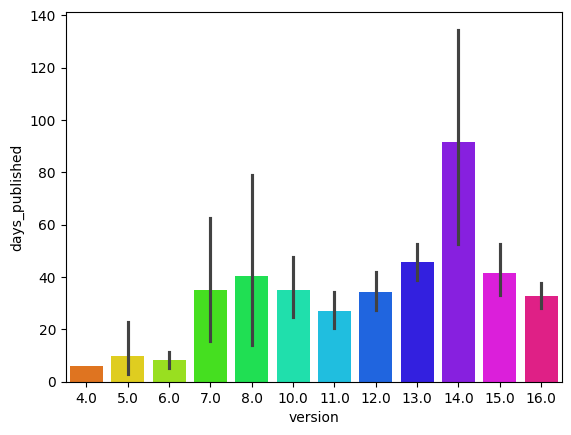

In [311]:
# Ensure the 'date' column is in datetime format
df_an['date'] = pd.to_datetime(df_an['date'], errors='coerce')

# Calculate days published
df_an['days_published'] = (datetime.now() - df_an['date']).dt.days

# Plot the data
sns.barplot(x='version', y='days_published', data=df_an, palette='hsv')

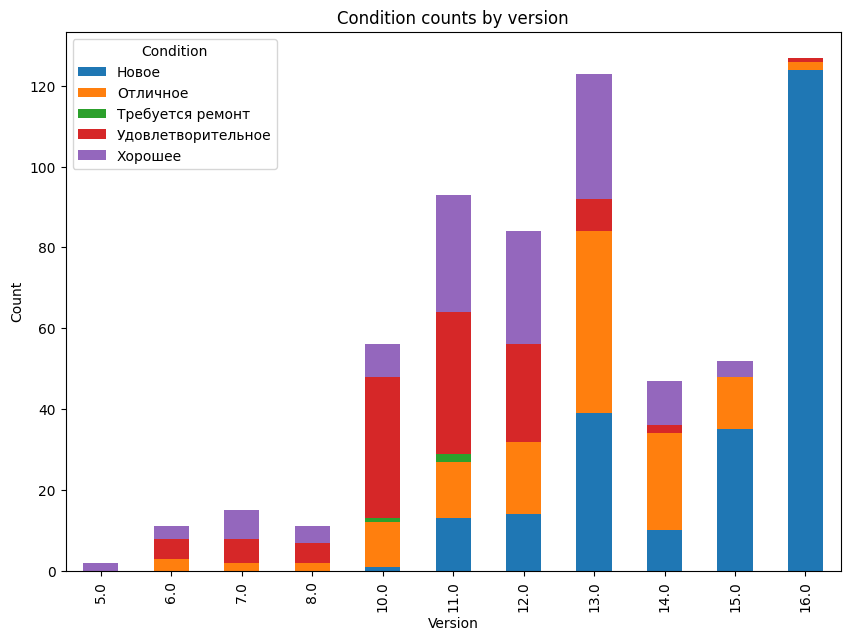

In [312]:
condition_counts = df.groupby(
    ['version', 'condition']).size().unstack(fill_value=0)

condition_counts.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.xlabel('Version')
plt.ylabel('Count')
plt.title('Condition counts by version')
plt.legend(title='Condition')
plt.show()

видим что ближе к новому году был резкий всплеск на просмотры 15 iphone


<Axes: xlabel='date', ylabel='views'>

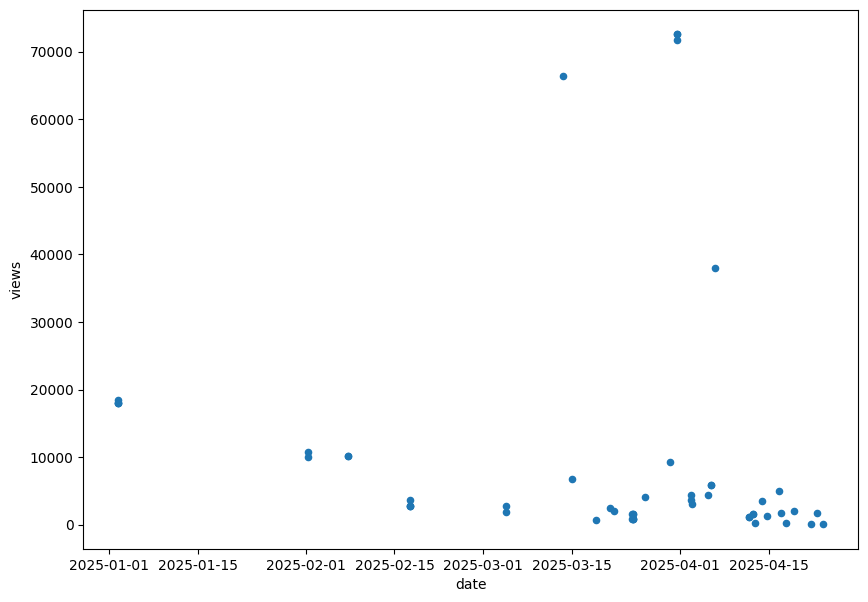

In [313]:
df_an[df_an['version'] == 15].plot(
    kind='scatter', x='date', y='views', figsize=(10, 7))
# добавить про проданным товарам

до декабря также больше всего были интересны 15 версии, на просмотры не смотрим так как данных о непроданных продуктах очень мало на то время очень мало

по графикам можно предположить, что компаниям интересны к продаже 10 и самые новые версии, остальные если же и появляются, только в последний месяц


Unsold versions before 2024-12-01: version
13.000    13
16.000     7
14.000     1
Name: count, dtype: int64


Text(0, 0.5, 'Count')

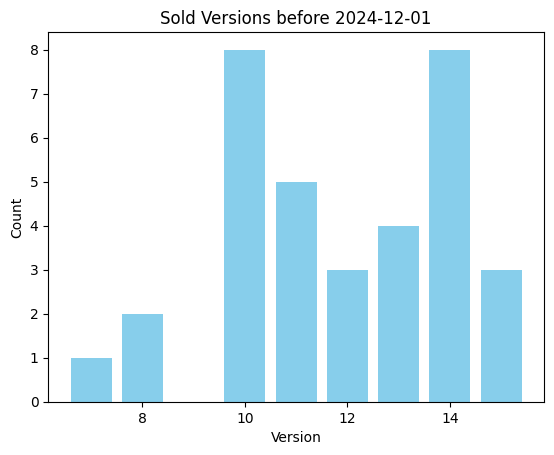

In [314]:
df_unsold_before = df_an[(df_an['date'] < '2024-12-01')
                         & (df_an['is_sold'] == False)]['version'].value_counts()
print(f'Unsold versions before 2024-12-01: {df_unsold_before}')

df_sold_before = df_an[(df_an['date'] < '2024-12-01') &
                       (df_an['is_sold'])]['version'].value_counts()
plt.bar(df_sold_before.index, df_sold_before.values, color='skyblue')
plt.title('Sold Versions before 2024-12-01')
plt.xlabel('Version')
plt.ylabel('Count')

# посмотреть сколько было выставлено и сколько продалось

### Новый признак определяющий выгоден ли телефон для покупки


In [315]:
version_prices = df.groupby(['version', 'is_pro', 'is_max', 'capacity', 'condition'])[
    'price'].mean().reset_index()
version_prices = version_prices.sort_values(by='price', ascending=False)
version_prices.head(10)

,version,is_pro,is_max,capacity,condition,price
131,16.000,True,True,1024.000,Новое,129697.500
130,16.000,True,True,512.000,Новое,116342.857
121,15.000,True,True,1024.000,Новое,107900.000
128,16.000,True,False,512.000,Новое,107432.500
129,16.000,True,True,256.000,Новое,101839.333
127,16.000,True,False,256.000,Новое,94879.630
120,15.000,True,True,512.000,Новое,87830.000
116,15.000,True,False,256.000,Новое,84990.000
118,15.000,True,True,256.000,Новое,84250.000
125,16.000,True,False,128.000,Новое,82378.000


In [316]:
df['price_coeff'] = df.groupby(['version', 'is_pro', 'is_max', 'capacity', 'condition'])[
    'price'].transform(lambda x: x / x.mean())
df.sort_values(by='price_coeff', ascending=True).head(10)

,link,version,condition,is_pro,is_max,capacity,price_coeff,title,price,characteristics,description,views,date,location,seller_id,today_views,about,is_sold,name,rating,reviews,subscribers,subscriptions,registered,done_deals,active_deals,docs_confirmed,phone_confirmed,response_time
367,https://www.avito.ru/sankt-peterburg/telefony/iphone_xr_64_gb_7256382772?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJMemxXVlVrZjBLNHpQWlBFIjt94U1kyz8AAAA,10.000,Удовлетворительное,False,False,64.000,0.154,"iPhone Xr, 64 ГБ",1111.000,"{'Производитель': 'Apple', 'Модель': 'iPhone Xr', 'Встроенная память': '64 ГБ', 'Цвет': 'Чёрный', 'IMEI': '**********91174'}",Iphone xr полностью в исправном все дефекты указаны на фото все вопросы в лс то есть обмен с моей доплатой цену предлагать!!!,2001.000,2025-03-24 17:46:00,Санкт-Петербург,ca84cfe8-b62d-4407-bb73-141f314c5185,12.000,"{'Состояние': 'Удовлетворительное', 'Экран': '1–2 мелкие царапины', 'Корпус': 'Мелкие царапины', 'Состояние аккумулятора': '74 %'}",False,Unknown,NaN,NaN,NaN,NaN,NaT,NaN,NaN,False,False,Отвечает за несколько часов
637,https://www.avito.ru/sankt-peterburg/telefony/iphone_xr_64_gb_7256382772?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJHWUVNMnZxWTVHVkVlWnFqIjt9FgLIoT8AAAA,10.000,Удовлетворительное,False,False,64.000,0.154,"iPhone Xr, 64 ГБ",1111.000,"{'Производитель': 'Apple', 'Модель': 'iPhone Xr', 'Встроенная память': '64 ГБ', 'Цвет': 'Чёрный', 'IMEI': '**********91174'}",Iphone xr полностью в исправном все дефекты указаны на фото все вопросы в лс то есть обмен с моей доплатой цену предлагать!!!,3662.000,2025-03-24 17:46:00,Санкт-Петербург,6fa3d9e7-5dac-4dc6-be89-07ae3d6e36cf,65.000,"{'Состояние': 'Удовлетворительное', 'Экран': '1–2 мелкие царапины', 'Корпус': 'Мелкие царапины', 'Состояние аккумулятора': '74 %'}",False,Unknown,NaN,NaN,NaN,NaN,NaT,NaN,NaN,False,False,Отвечает около часа
674,https://www.avito.ru/sankt-peterburg/telefony/iphone_13_128_gb_7343860976?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJKV2RxMWwzb0RLTXdtVFZ5Ijt92xWJBz8AAAA,13.000,Хорошее,False,False,128.000,0.430,"iPhone 13, 128 ГБ",11000.000,"{'Производитель': 'Apple', 'Модель': 'iPhone 13', 'Встроенная память': '128 ГБ', 'Цвет': 'Чёрный', 'IMEI': '**********81114'}",заблокированный Iphone 13 128gb после мошенников,102.000,2025-04-23 14:35:00,Санкт-Петербург,ecc85543-50c8-4786-9acb-2aea9b3b1631,102.000,"{'Состояние': 'Хорошее', 'Экран': 'Без дефектов', 'Корпус': 'Без дефектов', 'Состояние аккумулятора': '85 %', 'Комплект': 'Коробка'}",False,Unknown,1.000,NaN,NaN,NaN,NaT,NaN,NaN,False,False,Отвечает около часа
1030,https://www.avito.ru/sankt-peterburg/telefony/iphone_xr_64_gb_7323999935?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJOT3JkdE1rakNqSWxLcVc1Ijt9jr8Cez8AAAA,10.000,Удовлетворительное,False,False,64.000,0.555,"iPhone Xr, 64 ГБ",4000.000,"{'Производитель': 'Apple', 'Модель': 'iPhone Xr', 'Встроенная память': '64 ГБ', 'Цвет': 'Чёрный', 'IMEI': '**********43129'}","Продаю свой iPhone Xr с 64 ГБ встроенной памяти. Телефон в удовлетворительном состоянии, имеются сколы и трещины на экране, корпус с мелкой царапиной. Цвет черный. В комплекте оригинальная коробка. Телефон лагает. На видео шумит камера.",2285.000,2025-04-11 17:09:00,Санкт-Петербург,214c2d76-1a10-4d6f-bd9f-7246736d334f,90.000,"{'Состояние': 'Удовлетворительное', 'Экран': 'Сколы, трещины', 'Корпус': 'Мелкие царапины', 'Комплект': 'Коробка'}",False,Unknown,5.000,NaN,NaN,NaN,NaT,NaN,NaN,False,False,Отвечает за несколько часов
974,https://www.avito.ru/sankt-peterburg/telefony/iphone_6s_32_gb_7304648343?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJyTnVzWFEyejNodGNHZGpKIjt9roa8ez8AAAA,6.000,Удовлетворительное,False,False,32.000,0.661,"iPhone 6S, 32 ГБ",1600.000,"{'Производитель': 'Apple', 'Модель': 'iPhone 6S', 'Встроенная память': '32 ГБ', 'Цвет'

In [317]:
df['is_profitable'] = (df['price_coeff'] <= 0.99) & (
    df['rating'] > 4.5) & (df['reviews'] > 2) & (df['is_sold'] == False)

In [318]:
df[df['is_profitable']].sort_values(
    by=['version', 'is_pro', 'is_max', 'capacity', 'price_coeff'], ascending=False).head(10)

,link,version,condition,is_pro,is_max,capacity,price_coeff,title,price,characteristics,description,views,date,location,seller_id,today_views,about,is_sold,name,rating,reviews,subscribers,subscriptions,registered,done_deals,active_deals,docs_confirmed,phone_confirmed,response_time,is_profitable
562,https://www.avito.ru/sankt-peterburg/telefony/iphone_16_pro_max_512_gb_4247508226?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJWdTVtaDl6aldkQjl5MXJNIjt9-KiQMz8AAAA,16.000,Новое,True,True,512.000,0.962,"iPhone 16 Pro Max, 512 ГБ",111900.000,"{'Производитель': 'Apple', 'Модель': 'iPhone 16 Pro Max', 'Встроенная память': '512 ГБ', 'Цвет': 'Золотистый'}",Hoвый.,4599.000,2025-04-23 07:59:00,"Санкт-Петербург, ул. Жуковского, 28",/brands/i137588249,23.000,"{'Состояние': 'Новое', 'Коробка запечатана': 'Да', 'Комплект': 'Коробка'}",False,Texno Yard,5.000,2116.000,4705.000,38.000,2018-06-01,123.000,220.000,False,False,None,True
571,https://www.avito.ru/sankt-peterburg/telefony/iphone_16_pro_max_512_gb_4487036503?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJWdTVtaDl6aldkQjl5MXJNIjt9-KiQMz8AAAA,16.000,Новое,True,True,512.000,0.962,"iPhone 16 Pro Max, 512 ГБ",111900.000,"{'Производитель': 'Apple', 'Модель': 'iPhone 16 Pro Max', 'Встроенная память': '512 ГБ', 'Цвет': 'Чёрный'}","HOВЫЙ, ЗАПEЧАТАННЫЙ",4868.000,2025-04-10 13:04:00,Санкт-Петербург,/brands/i183466761,29.000,"{'Состояние': 'Новое', 'Коробка запечатана': 'Да', 'Комплект': 'Коробка'}",False,Магазин Yard,5.000,1152.000,2743.000,25.000,2020-06-01,233.000,82.000,False,False,Отвечает около 30 минут,True
681,https://www.avito.ru/sankt-peterburg/telefony/iphone_16_pro_max_512_gb_4487036503?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJKV2RxMWwzb0RLTXdtVFZ5Ijt92xWJBz8AAAA,16.000,Новое,True,True,512.000,0.962,"iPhone 16 Pro Max, 512 ГБ",111900.000,"{'Производитель': 'Apple', 'Модель': 'iPhone 16 Pro Max', 'Встроенная память': '512 ГБ', 'Цвет': 'Чёрный'}","HОВЫЙ, ЗАПЕЧАТAННЫЙ",4871.000,2025-04-10 13:04:00,Санкт-Петербург,/brands/i183466761,32.000,"{'Состояние': 'Новое', 'Коробка запечатана': 'Да', 'Комплект': 'Коробка'}",False,Магазин Yard,5.000,1152.000,2743.000,25.000,2020-06-01,233.000,82.000,False,False,Отвечает около 30 минут,True
492,https://www.avito.ru/sankt-peterburg/telefony/iphone_16_pro_max_256_gb_7266685002?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJEMzN1SGlQbnEzUVlTMndoIjt9Om5sNT8AAAA,16.000,Новое,True,True,256.000,0.987,"iPhone 16 Pro Max, 256 ГБ",100500.000,"{'Производитель': 'Apple', 'Модель': 'iPhone 16 Pro Max', 'Встроенная память': '256 ГБ', 'Цвет': 'Белый'}",🍏Ценa актуaльнaя! Товaр в наличии!,231.000,2025-04-02 22:37:00,"Санкт-Петербург, Лиговский пр-т, 215",/brands/friendlystore,28.000,"{'Состояние': 'Новое', 'Коробка запечатана': 'Да', 'Комплект': 'Коробка, Провод зарядки'}",False,FRIENDLY STORE,4.900,217.000,282.000,15.000,2018-01-01,282.000,45.000,False,False,Отвечает около 30 минут,True
514,https://www.avito.ru/sankt-peterburg/telefony/iphone_16_pro_max_256_gb_7257148384?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJKbllkWWxiZUhIVE5iZVVBIjt9NRZcuD8AAAA,16.000,Новое,True,True,256.000,0.967,"iPhone 16 Pro Max, 256 ГБ",98490.000,"{'Производитель': 'Apple', 'Модель': 'iPhone 16 Pro Max', 'Встроенная память': '256 ГБ', 'Цвет': 'Чёрный'}",🔥Гаpантия лучшeй цeны🔥,1154.000,2025-03-28 14:42:00,"Санкт-Петербург, пл. Стачек, 9",/brands/244096b73b687e69b4c9374622919ee3,18.000,"{'Состояние': 'Новое', 'Коробка запечатана': 'Да', 'Комплект': 'Коробка, Провод зарядки'}",False,te:hub - Магазин цифровой техники,4.800,274.000,848.000,0.000,2024-06-01,34.000,215.000,False,False,Отвечает около 30 минут,True
552,https://www.avito.ru/sankt-peterburg/telefony/iphone_16_pro_max_256_gb_7257884626?context=H4sIAAAAAAAA_wE_AMD_YToyOntzOjEzOiJsb2NhbFByaW9yaXR5IjtiOjA7czoxOiJ4IjtzOjE2OiJKbllkWWxiZ

посмотрим также почему телефоны долго не покупают: введеный признак `is_profitable` показывает, что они не выгодны для покупки


In [319]:
df[(df.date < '2024-12-01') & (df.is_profitable)].shape

(3, 30)

### Preprocessing and Model Building


In [320]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [321]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [322]:
unnecessary_features = ['description', 'link', 'seller_id', 'location',
                        'about', 'characteristics', 'price_coeff', 'is_profitable', 'title', 'name', 'response_time']
df_encoded = df.drop(unnecessary_features, axis=1)

aditional = ['views', 'date', 'today_views', 'registered', 'is_sold']

df_encoded = df_encoded.drop(aditional, axis=1)

df_encoded = df_encoded.drop_duplicates()
df_encoded = df_encoded.dropna()

X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

num_columns = X.select_dtypes(include=[np.number]).columns
cat_features = X.select_dtypes(include=['object']).columns
bool_columns = X.select_dtypes(include=[np.bool]).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
bool_transformer = OneHotEncoder(handle_unknown='ignore')

transformer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_features),
        ('bool', bool_transformer, bool_columns)
    ])


X_train = transformer.fit_transform(X_train)
# print Xtrain types

X_test = transformer.transform(X_test)

In [323]:
print(pd.DataFrame(X_train, columns=num_columns.tolist() + list(transformer.named_transformers_['cat'].get_feature_names_out(
    cat_features)) + list(transformer.named_transformers_['bool'].get_feature_names_out(bool_columns))).dtypes)

version                         float64
capacity                        float64
rating                          float64
reviews                         float64
subscribers                     float64
subscriptions                   float64
done_deals                      float64
active_deals                    float64
condition_Новое                 float64
condition_Отличное              float64
condition_Удовлетворительное    float64
condition_Хорошее               float64
is_pro_False                    float64
is_pro_True                     float64
is_max_False                    float64
is_max_True                     float64
docs_confirmed_False            float64
docs_confirmed_True             float64
phone_confirmed_False           float64
phone_confirmed_True            float64
dtype: object


In [324]:
X.dtypes

version            float64
condition           object
is_pro                bool
is_max                bool
capacity           float64
rating             float64
reviews            float64
subscribers        float64
subscriptions      float64
done_deals         float64
active_deals       float64
docs_confirmed        bool
phone_confirmed       bool
dtype: object

In [325]:
scores = {}
X.columns

Index(['version', 'condition', 'is_pro', 'is_max', 'capacity', 'rating', 'reviews', 'subscribers', 'subscriptions', 'done_deals', 'active_deals', 'docs_confirmed', 'phone_confirmed'], dtype='object')

In [326]:
# Logistic Regression
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
scores['Linear Regression'] = lg_model.score(X_test, y_test)

In [327]:
# Decision Tree
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
scores['Decision Tree'] = dt_model.score(X_test, y_test)

In [328]:
# Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
scores['Random Forest'] = rf_model.score(X_test, y_test)

In [329]:
# LightGBM
lgbm_model = LGBMRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
lgbm_model.fit(X_train, y_train)
scores['LightGBM'] = lgbm_model.score(X_test, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 212
[LightGBM] [Info] Number of data points in the train set: 223, number of used features: 19
[LightGBM] [Info] Start training from score 52083.071749
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [330]:
# XGBoost
xgb_model = XGBRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
scores['XGBoost'] = xgb_model.score(X_test, y_test)

#### Берем 2 модели с наилучшими результатами


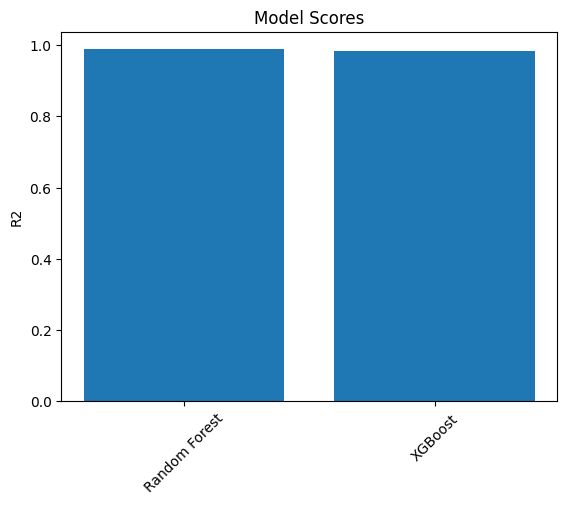

In [331]:
sorted_scores = dict(sorted(scores.items(), key=lambda x: x[1], reverse=True))
top2scores = dict(list(sorted_scores.items())[:2])
plt.bar(top2scores.keys(), top2scores.values())
plt.title('Model Scores')
plt.ylabel('R2')
plt.xticks(rotation=45)
plt.show()

In [332]:
scores.items()

dict_items([('Linear Regression', 0.04), ('Decision Tree', 0.9667799830808886), ('Random Forest', 0.9878479769165368), ('LightGBM', 0.9547619753242699), ('XGBoost', 0.984738592128906)])

### Тюнинг модели


In [333]:
import optuna

In [334]:
def get_optuna_scores(study):
    optuna_results = []
    for trial in study.trials:
        optuna_results.append({
            "Trial": trial.number,
            "n_estimators": trial.params.get("n_estimators"),
            "max_depth": trial.params.get("max_depth"),
            "Score": trial.value
        })

    optuna_results_df = pd.DataFrame(optuna_results)
    optuna_results_df = optuna_results_df.sort_values(
        by="Score", ascending=False)

    return optuna_results_df

In [335]:
# Optuna for XGBoost
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
    }

    model = XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)

    return score


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

get_optuna_scores(study)[:5]

[I 2025-04-23 22:08:50,678] A new study created in memory with name: no-name-da5fb3d0-44f1-4f28-bc43-4200f183edc5
[I 2025-04-23 22:08:51,033] Trial 0 finished with value: 0.9811148482397534 and parameters: {'n_estimators': 104, 'learning_rate': 0.21116480299798585, 'max_depth': 7}. Best is trial 0 with value: 0.9811148482397534.
[I 2025-04-23 22:08:51,388] Trial 1 finished with value: 0.9794128779777942 and parameters: {'n_estimators': 154, 'learning_rate': 0.13375634023391694, 'max_depth': 6}. Best is trial 0 with value: 0.9811148482397534.
[I 2025-04-23 22:08:51,619] Trial 2 finished with value: 0.983856882983761 and parameters: {'n_estimators': 179, 'learning_rate': 0.056139093307270786, 'max_depth': 4}. Best is trial 2 with value: 0.983856882983761.
[I 2025-04-23 22:08:51,759] Trial 3 finished with value: 0.9840433668872307 and parameters: {'n_estimators': 69, 'learning_rate': 0.2032012646308848, 'max_depth': 6}. Best is trial 3 with value: 0.9840433668872307.
[I 2025-04-23 22:08:5

,Trial,n_estimators,max_depth,Score
14,14,168,5,0.987
22,22,118,5,0.987
15,15,136,5,0.987
16,16,129,5,0.986
20,20,163,10,0.986


сохраняем модель


In [336]:
best_params = study.best_params
final_model = XGBRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)

final_model.save_model('../models/xgb_model.json')

In [337]:
# INFO:root:Features for prediction:    version  condition_Новое  condition_Отличное  condition_Хорошее  condition_Удовлетворительное  capacity  rating  reviews  subscribers  ...  active_deals  is_pro_False  is_pro_True  is_max_False  is_max_True  docs_confirmed_False  docs_confirmed_True  phone_confirmed_False  phone_confirmed_True
# 0     11.0                0                   1                  0                             0       128     5.0    550.0      10000.0  ...         300.0             1            0             1            0                     1                    0                      0                     1
# X_test_data = { "version": 11.0, "condition": "Отличное", "capacity": 128, "rating": 5.0, "reviews": 550.0, "subscribers": 10000.0, "subscriptions": 0.0, "done_deals": 26.0 , "active_deals": 300.0, "is_pro": False, "is_max": False, "docs_confirmed": False, "phone_confirmed": True}
# X_test_data = pd.DataFrame([X_test_data])
# X_test = pd.DataFrame(X_test_data, columns=num_columns.tolist() + list(transformer.named_transformers_['cat'].get_feature_names_out(
#     cat_features)) + list(transformer.named_transformers_['bool'].get_feature_names_out(bool_columns)))
# final_model.predict(X_test)

In [338]:
# Optuna for Random Forest
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
    }

    model = RandomForestRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)

    return score


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

get_optuna_scores(study)[:5]

[I 2025-04-23 22:09:01,474] A new study created in memory with name: no-name-e094c92c-5eb7-4caf-96b6-5e220140409f
[I 2025-04-23 22:09:01,606] Trial 0 finished with value: 0.986774832208318 and parameters: {'n_estimators': 110, 'max_depth': 8}. Best is trial 0 with value: 0.986774832208318.
[I 2025-04-23 22:09:01,716] Trial 1 finished with value: 0.9874638739421525 and parameters: {'n_estimators': 133, 'max_depth': 8}. Best is trial 1 with value: 0.9874638739421525.
[I 2025-04-23 22:09:01,773] Trial 2 finished with value: 0.9845457894233617 and parameters: {'n_estimators': 66, 'max_depth': 7}. Best is trial 1 with value: 0.9874638739421525.
[I 2025-04-23 22:09:01,845] Trial 3 finished with value: 0.9511078325475939 and parameters: {'n_estimators': 94, 'max_depth': 3}. Best is trial 1 with value: 0.9874638739421525.
[I 2025-04-23 22:09:02,039] Trial 4 finished with value: 0.9859232236929164 and parameters: {'n_estimators': 117, 'max_depth': 9}. Best is trial 1 with value: 0.9874638739421

,Trial,n_estimators,max_depth,Score
16,16,129,10,0.988
11,11,147,10,0.988
25,25,159,10,0.988
22,22,101,10,0.988
18,18,101,10,0.988


SHAP


In [339]:
import shap

shap.initjs()

['condition_Новое', 'condition_Отличное', 'condition_Удовлетворительное', 'condition_Хорошее']


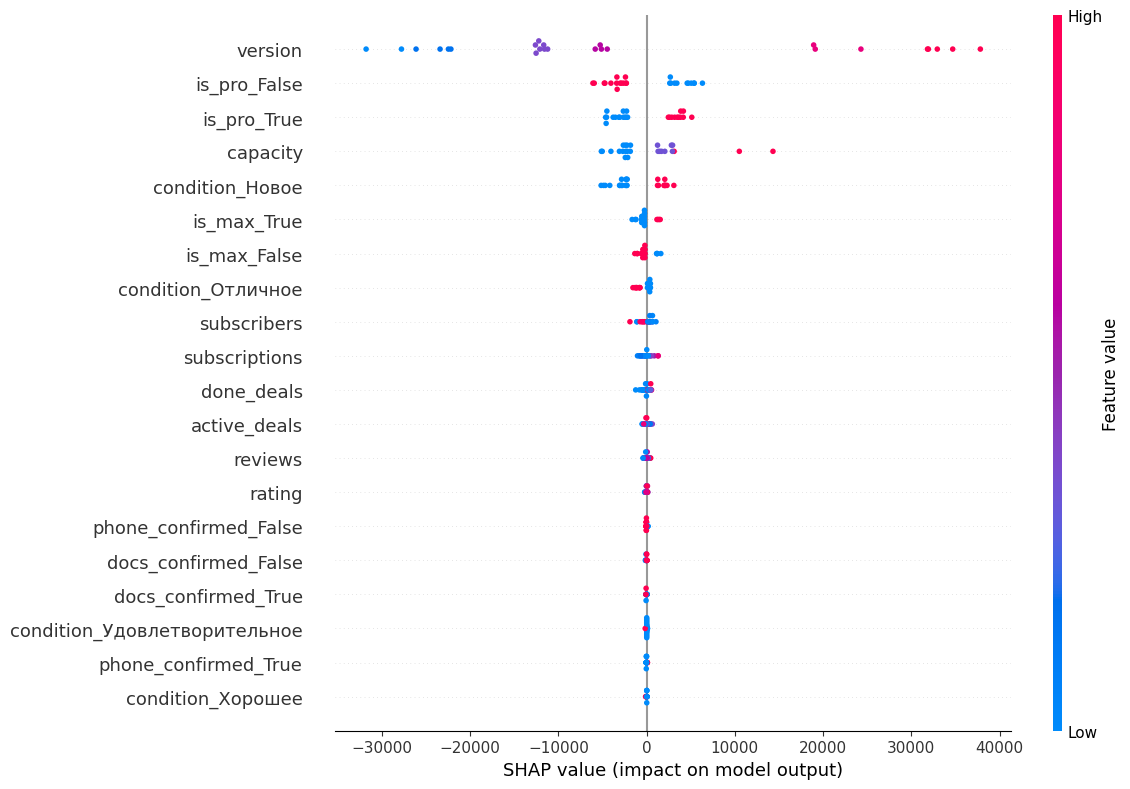

In [340]:
# Convert X_test to a dense NumPy array
X_test_dense = X_test.toarray() if hasattr(X_test, "toarray") else X_test

# Initialize the SHAP explainer
explainer = shap.Explainer(rf_model)
shap_values = explainer(X_test_dense)

# Extract feature names
num_features = num_columns.tolist()
cat_feature_names = transformer.named_transformers_[
    'cat'].get_feature_names_out(cat_features).tolist()
bool_feature_names = transformer.named_transformers_[
    'bool'].get_feature_names_out(bool_columns).tolist()
print(cat_feature_names)
feature_names = num_features + cat_feature_names + bool_feature_names

# Update feature names in SHAP values
shap_values.feature_names = feature_names

# Plot the SHAP summary
shap.summary_plot(shap_values, X_test_dense,
                  feature_names=feature_names, plot_size=(12, 8))

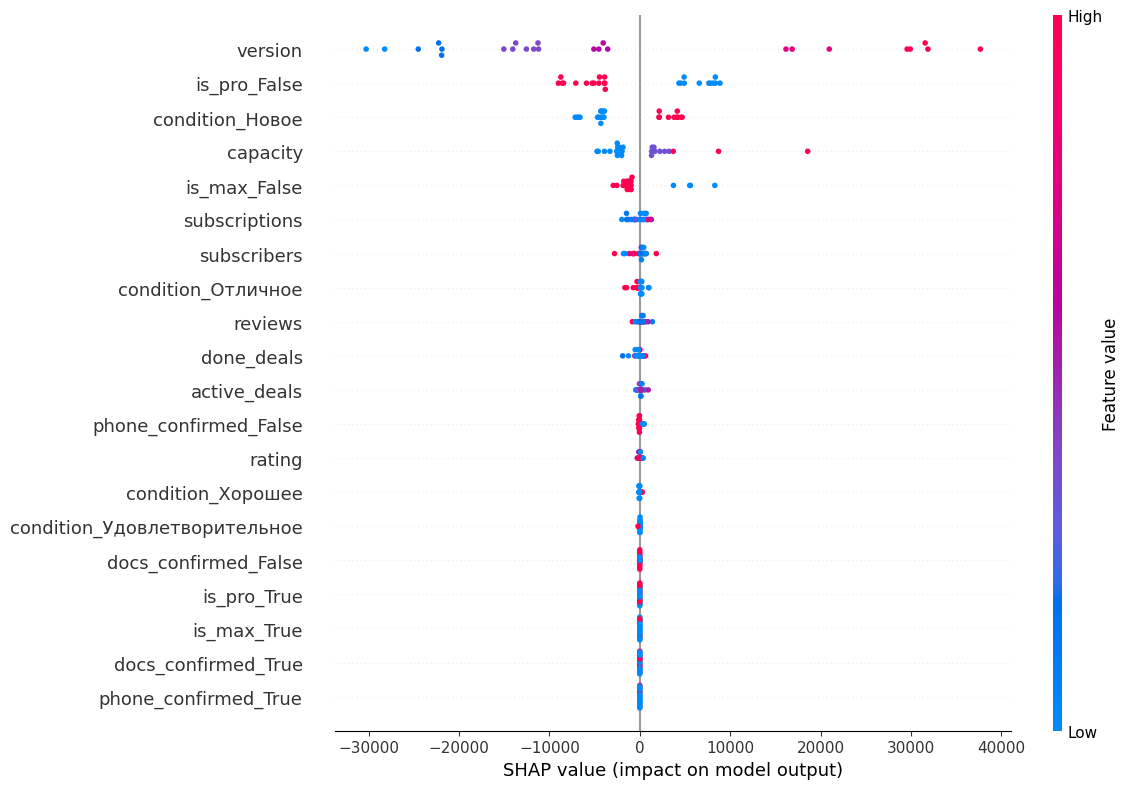

In [341]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

num_features = num_columns.tolist()
cat_feature_names = transformer.named_transformers_[
    'cat'].get_feature_names_out(cat_features).tolist()
bool_feature_names = transformer.named_transformers_[
    'bool'].get_feature_names_out(bool_columns).tolist()

feature_names = num_features + cat_feature_names + bool_feature_names
shap_values.feature_names = feature_names
shap.summary_plot(shap_values, X_test,
                  feature_names=feature_names, plot_size=(12, 8))

array([[<Axes: title={'center': 'version'}>,
        <Axes: title={'center': 'capacity'}>,
        <Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'reviews'}>],
       [<Axes: title={'center': 'subscribers'}>,
        <Axes: title={'center': 'subscriptions'}>,
        <Axes: title={'center': 'done_deals'}>,
        <Axes: title={'center': 'active_deals'}>],
       [<Axes: title={'center': 'condition_Новое'}>,
        <Axes: title={'center': 'condition_Отличное'}>,
        <Axes: title={'center': 'condition_Удовлетворительное'}>,
        <Axes: title={'center': 'condition_Хорошее'}>],
       [<Axes: title={'center': 'is_pro_False'}>,
        <Axes: title={'center': 'is_pro_True'}>,
        <Axes: title={'center': 'is_max_False'}>,
        <Axes: title={'center': 'is_max_True'}>],
       [<Axes: title={'center': 'docs_confirmed_False'}>,
        <Axes: title={'center': 'docs_confirmed_True'}>,
        <Axes: title={'center': 'phone_confirmed_False'}>,
        <Axes: t

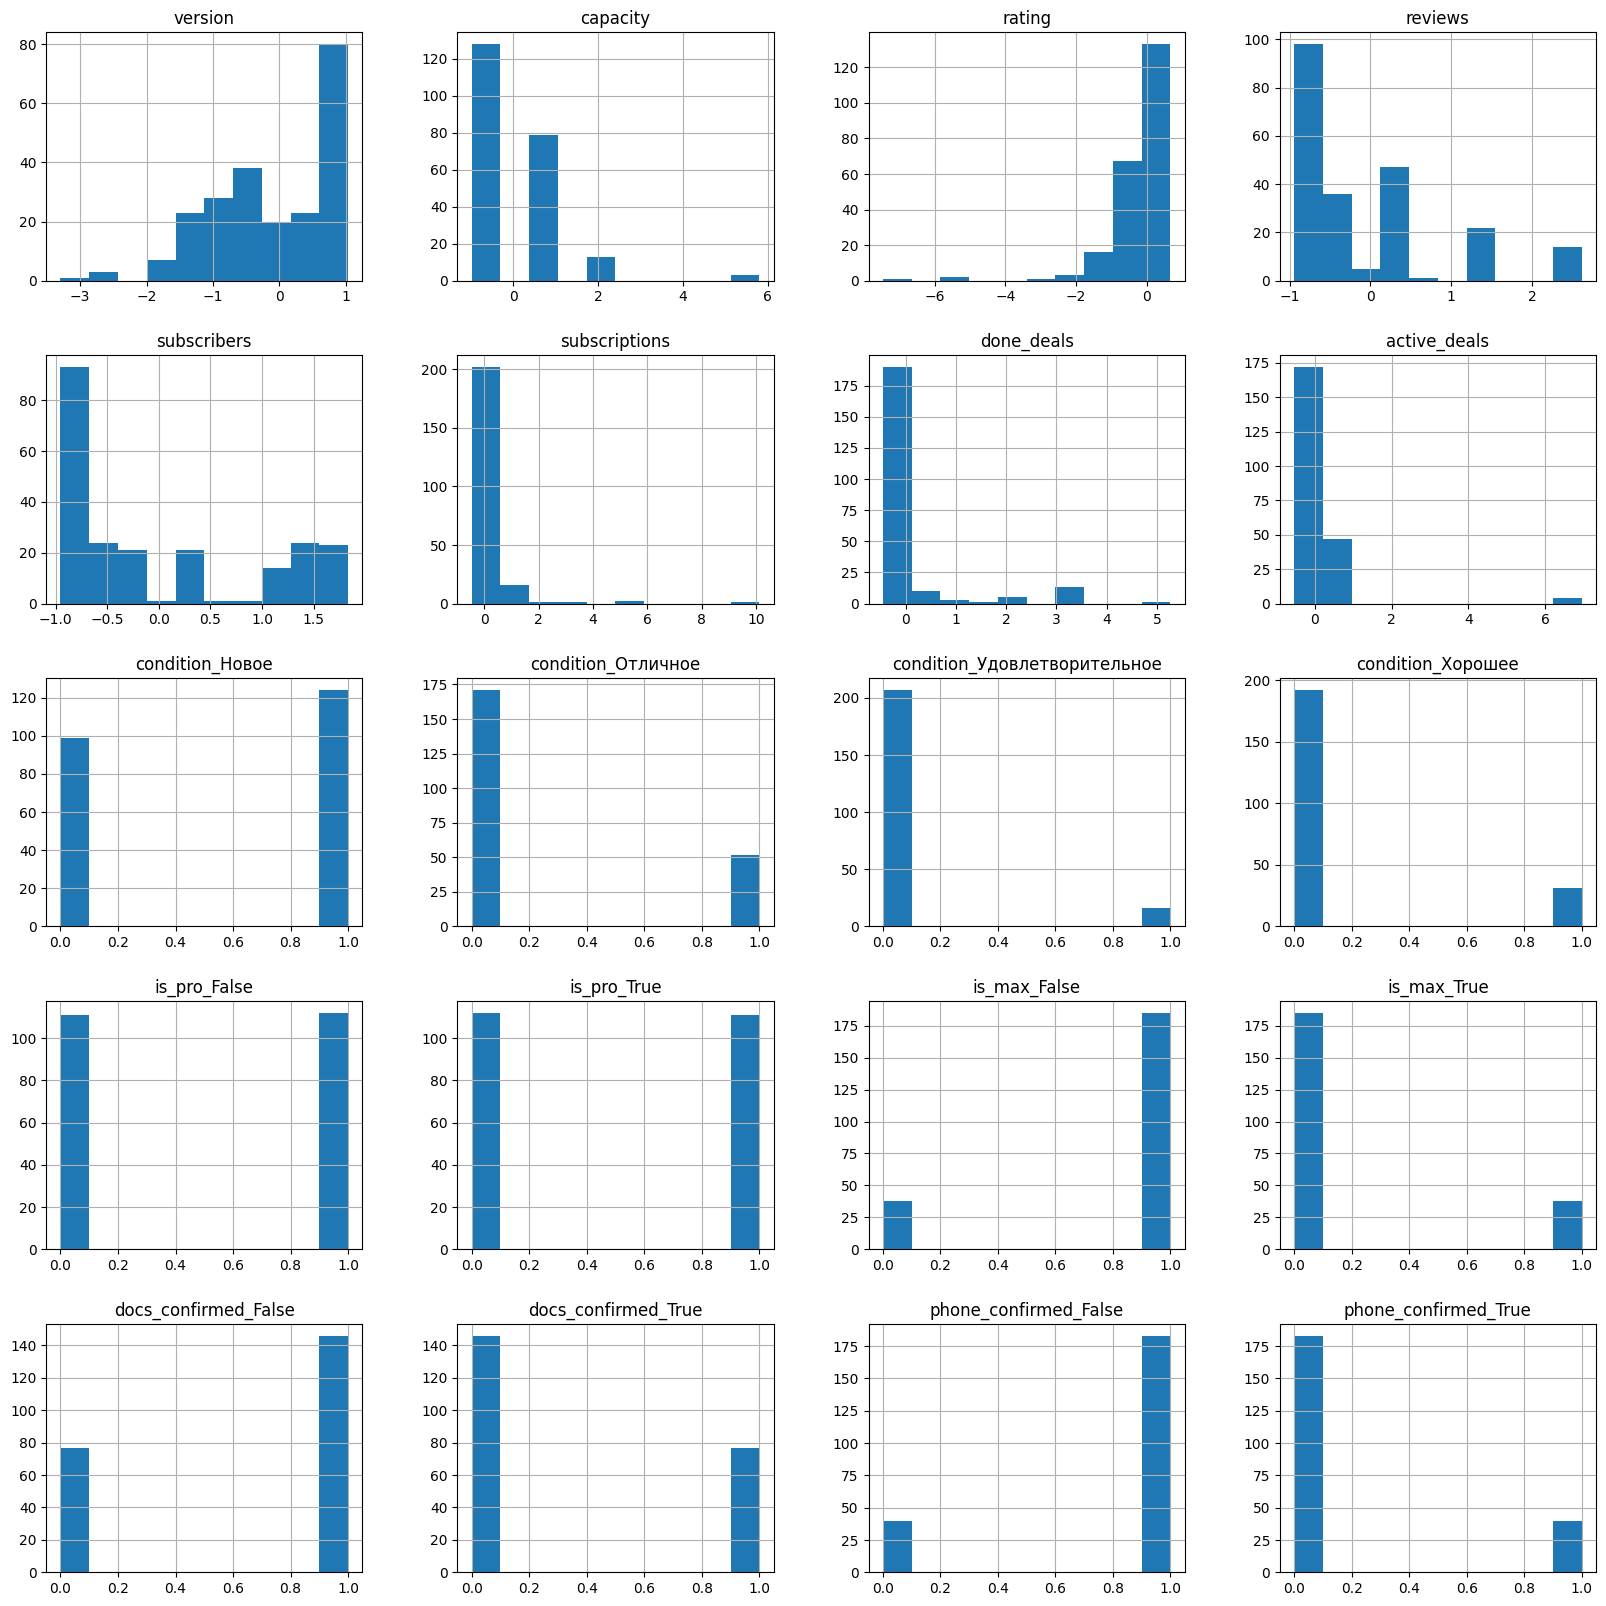

In [342]:
# Convert X_train back to DataFrame
X_train_df = pd.DataFrame(X_train.toarray() if hasattr(X_train, "toarray") else X_train,
                          columns=num_columns.tolist() + transformer.named_transformers_['cat'].get_feature_names_out(cat_features).tolist() + transformer.named_transformers_['bool'].get_feature_names_out(bool_columns).tolist())
X_train_df.hist(figsize=(20, 20))

<Axes: >

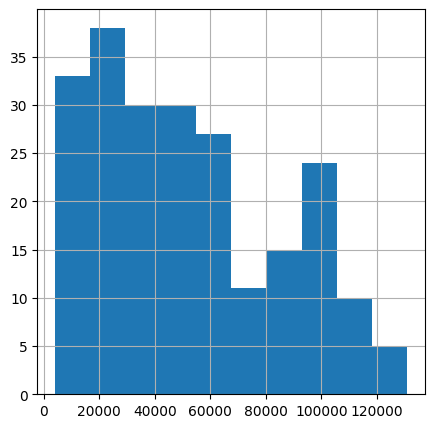

In [343]:
y_train.hist(figsize=(5, 5))